In [1]:
import os
import numpy as np
import random
import tensorflow as tf

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
# number of stake images
num_steak_images_train = len(os.listdir("./pizza_steak/train/steak"))

In [4]:
num_steak_images_train

751

In [5]:
# get classnames programmaticlly
import pathlib
import numpy as np
data_dir = pathlib.Path("./pizza_steak/train")
classnames = np.array(sorted([item.name for item in data_dir.glob("*")]))

In [6]:
classnames

array(['pizza', 'steak'], dtype='<U5')

In [7]:
# let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir,target_class):
    target_folder = target_dir + "/" + target_class
    # get random image path
    random_image = random.sample(os.listdir(target_folder),1)
    # read in the iamge and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.axis("off")
    print(f"Image shape : {img.shape}")
    return img
    

Image shape : (512, 384, 3)


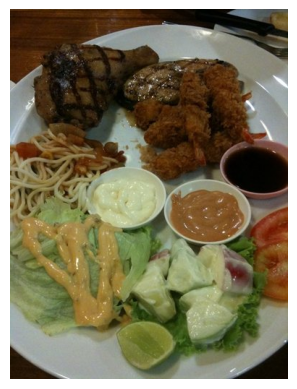

In [8]:
img = view_random_image("./pizza_steak/train","steak")

In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed 
tf.random.set_seed(42)

# Folders structure should be like that   /pizza_steak/{train,test}/{pizza,steak}/images..
# preprocess data (get all of the pixel value between 0 & 1 alse called normalization)
train_datagen = ImageDataGenerator(rescale=1./255) # multiply the data with the rescale number
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the path to ourr data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# import data from sirectories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir, # Target size of images
                                              batch_size=32, # Size of minibatches to load data into
                                              target_size=(244,244),# Target size of images (height,width)
                                              class_mode="binary", # Type of problem you're working  with
                                              seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                              batch_size=32,
                                              target_size=(244,244),
                                              class_mode="binary",
                                              seed=42)

len(train_data)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


47

In [39]:
# Build a CNN Model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu",
                          input_shape=(244,244,3)),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                             padding="valid"),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu"),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,
                          activation="sigmoid")
])

# compile our CNN model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
             optimizer=tf.keras.optimizers.legacy.Adam(),
             metrics=["accuracy"])

# Fit the model
history = model_1.fit(train_data,
                     epochs=5,
                     steps_per_epoch=len(train_data), # The number of batches
                     validation_data=valid_data,
                     validation_steps=len(valid_data))# The number of batches


Epoch 1/5
 6/47 [==>...........................] - ETA: 30s - loss: 1.2447 - accuracy: 0.5000 

KeyboardInterrupt: 

In [40]:
# base line model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                          padding="valid",
                          activation="relu",
                          input_shape=(244,244,3)),
    
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                          padding="valid",
                          activation="relu"),
    
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                          padding="valid",
                          activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_2.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history = model_2.fit(
            train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 43s 902ms/step - loss: 3.0302 - accuracy: 0.4407 - val_loss: 0.6838 - val_accuracy: 0.6140
Epoch 2/5
47/47 [==============================] - 41s 877ms/step - loss: 0.6746 - accuracy: 0.6127 - val_loss: 0.6598 - val_accuracy: 0.6420
Epoch 3/5
47/47 [==============================] - 40s 858ms/step - loss: 0.6054 - accuracy: 0.7293 - val_loss: 0.5770 - val_accuracy: 0.7080
Epoch 4/5
47/47 [==============================] - 41s 868ms/step - loss: 0.4770 - accuracy: 0.8207 - val_loss: 0.5227 - val_accuracy: 0.7640
Epoch 5/5
47/47 [==============================] - 42s 885ms/step - loss: 0.3922 - accuracy: 0.8480 - val_loss: 0.5294 - val_accuracy: 0.7600


In [12]:
import pandas as pd 
history_df = pd.DataFrame(history.history)

<AxesSubplot: >

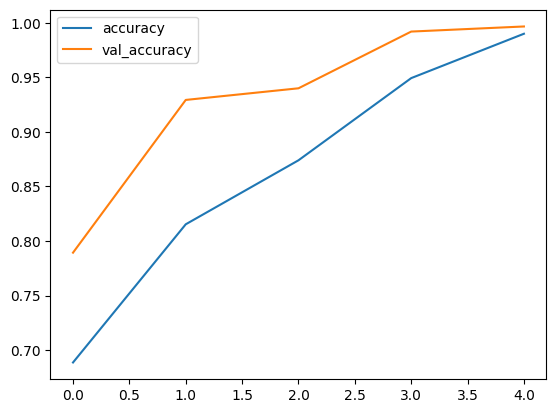

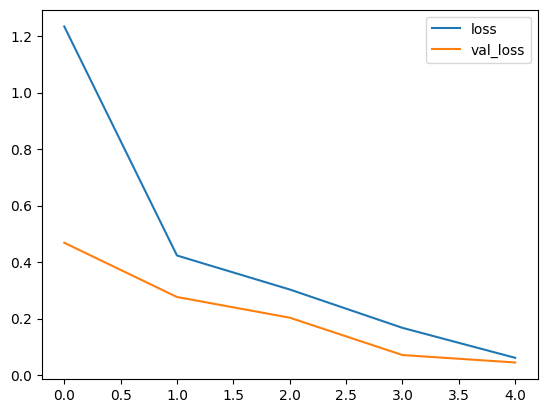

In [13]:
history_df[["accuracy","val_accuracy"]].plot()
history_df[["loss","val_loss"]].plot()

In [14]:
model_2.evaluate(valid_data),model_2.evaluate(train_data)

47/47 [==============================] - 7s 150ms/step - loss: 0.0448 - accuracy: 0.9967


([0.04476526752114296, 0.996666669845581],
 [0.04476526752114296, 0.996666669845581])

In [15]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 242, 242, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 240, 240, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 238, 238, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 566440)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 566441    
                                                                 
Total params: 568,541
Trainable params: 568,541
Non-trainable params: 0
_________________________________________________________________


### Adjust the model
Fitting machine learning model comes in3 steps:

0. create baseline
1. Beat the baseline by overfitting a larger model
3. Reduce Oovverfitting

Ways to induce overfitting:
* Increase the number of conv layers 
* Increase the number of conv filters
* Add anotther dense layer to the ouutput of our falattened 

Ways to reduce overfittig
* Add data augmentation
* Add regularization such as (MaxPool2D)
* Add more data



In [16]:
# Build a CNN with max pooling layer
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu",
                            padding="valid", # NO padding
                          input_shape=(244,244,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu",
                          ),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu",
                          ),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compiling the model
model_3.compile(loss="binary_crossentropy",
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"])

# Fitting the model
history_3 = model_3.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 19s 383ms/step - loss: 0.6067 - accuracy: 0.6800 - val_loss: 0.5225 - val_accuracy: 0.7627
Epoch 2/5
47/47 [==============================] - 18s 377ms/step - loss: 0.5031 - accuracy: 0.7687 - val_loss: 0.4662 - val_accuracy: 0.7733
Epoch 3/5
47/47 [==============================] - 18s 381ms/step - loss: 0.4292 - accuracy: 0.8120 - val_loss: 0.3998 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 18s 384ms/step - loss: 0.4009 - accuracy: 0.8213 - val_loss: 0.3967 - val_accuracy: 0.8293
Epoch 5/5
47/47 [==============================] - 18s 394ms/step - loss: 0.3600 - accuracy: 0.8433 - val_loss: 0.3604 - val_accuracy: 0.8467


<AxesSubplot: >

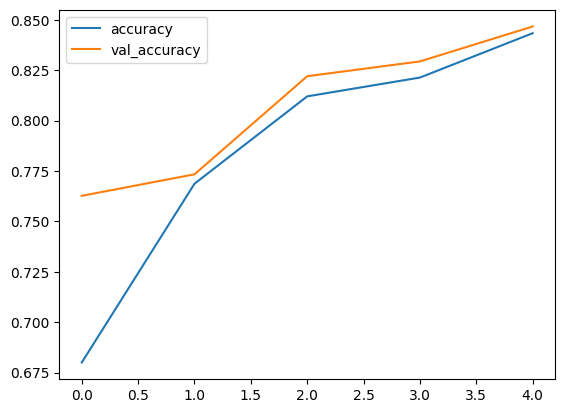

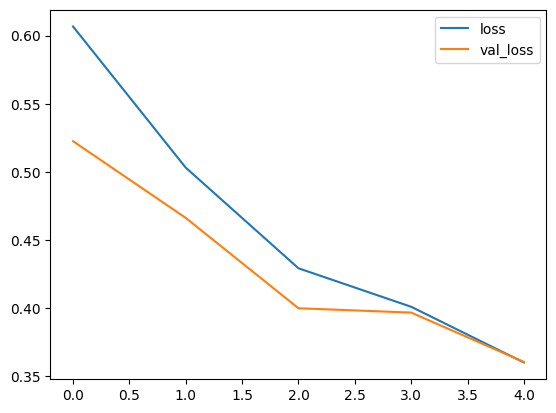

In [17]:
history3_df = pd.DataFrame(history_3.history)
history3_df[["accuracy","val_accuracy"]].plot()
history3_df[["loss","val_loss"]].plot()

In [18]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 242, 242, 10)      280       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 121, 121, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 119, 119, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 59, 59, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 57, 57, 10)        910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 28, 28, 10)      

* What is Data augmenation<br />
Data augmentation is a technique commonly used in machine learning and computer vision to increase the size and diversity of a training dataset. It involves applying various transformations or modifications to the existing data samples, creating new synthetic examples that retain the same semantic information as the original data.

In [130]:
# reduce overfitting by adding data augmentaion

# create ImageDataGenerator training instances with real time data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.3,
                                           horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentaion for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [131]:
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(244,244),
                                                                  batch_size=32,
                                                                  class_mode="binary",
                                                                  shuffle=True)
# created non-augmneted train data batches
print("non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(244,244),
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle=True)
# created non-augmneted train data batches
print("Non-augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size=(244,244),
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle=True)

Augmented training data
Found 1500 images belonging to 2 classes.
non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


> **Note :** Data augmentation is usually only performed in training data,Using  the ImageDataGenerator built-in data augmentaion parameters our images are images are left  as they are in the directories but are modified as they're loaded into the model

In [132]:
# Get sample data batches
images ,labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

Showing image number:11
Showing augmented image number:11


<Figure size 640x480 with 0 Axes>

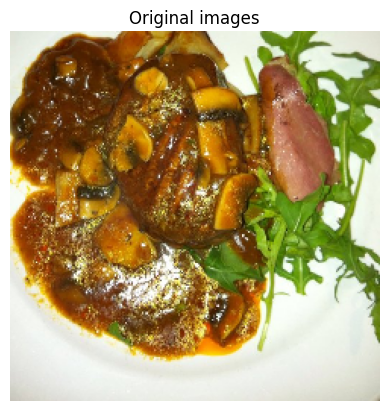

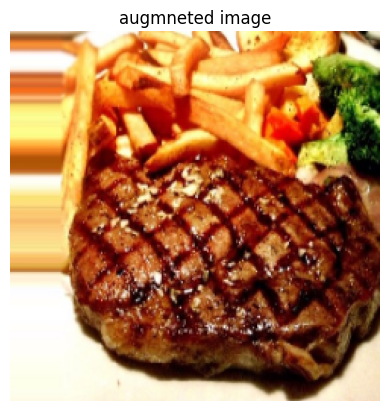

<Figure size 640x480 with 0 Axes>

In [133]:
# show original image and augmented image
import random
random_number = random.randint(0,32)
print(f"Showing image number:{random_number}")
plt.imshow(images[random_number])
plt.title(f"Original images")
plt.axis(False)
plt.figure()
print(f"Showing augmented image number:{random_number}")
plt.imshow(augmented_images[random_number])
plt.title(f"augmneted image")
plt.axis(False)
plt.figure()

#### Training the model on augmented data

In [134]:
model_4 =  tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=30,
                          kernel_size=3,
                          activation="relu",
                            padding="valid", # NO padding
                          input_shape=(244,244,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu",
                          ),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu",
                          ),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu",
                          ),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [135]:
# compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [136]:
# fit the model
model_4.fit(train_data_augmented,epochs=8,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/8
47/47 [==============================] - 36s 734ms/step - loss: 0.6497 - accuracy: 0.6053 - val_loss: 0.4971 - val_accuracy: 0.7620
Epoch 2/8
47/47 [==============================] - 34s 714ms/step - loss: 0.5743 - accuracy: 0.6940 - val_loss: 0.4205 - val_accuracy: 0.8240
Epoch 3/8
47/47 [==============================] - 33s 707ms/step - loss: 0.5218 - accuracy: 0.7440 - val_loss: 0.3783 - val_accuracy: 0.8440
Epoch 4/8
47/47 [==============================] - 33s 706ms/step - loss: 0.5097 - accuracy: 0.7640 - val_loss: 0.4359 - val_accuracy: 0.7900
Epoch 5/8
47/47 [==============================] - 33s 699ms/step - loss: 0.4880 - accuracy: 0.7720 - val_loss: 0.4558 - val_accuracy: 0.7780
Epoch 6/8
47/47 [==============================] - 33s 701ms/step - loss: 0.4629 - accuracy: 0.7800 - val_loss: 0.3153 - val_accuracy: 0.8600
Epoch 7/8
47/47 [==============================] - 34s 728ms/step - loss: 0.4485 - accuracy: 0.7920 - val_loss: 0.3030 - val_accuracy: 0.8720
Epoch 

# !!!!!! do not forget to shuffle the data

In [137]:
def load_preprocess_image(filename,image_shape):
    # read the image 
    img = tf.io.read_file(filename)
    # decode the image into a tensor
    img = tf.image.decode_image(img)
    # resize the image
    img = tf.image.resize(img,size=[image_shape,image_shape])
    return img / 255.

In [138]:
image = load_preprocess_image("steak.jpg",244)
image.shape,tf.expand_dims(image,axis=0).shape

(TensorShape([244, 244, 3]), TensorShape([1, 244, 244, 3]))

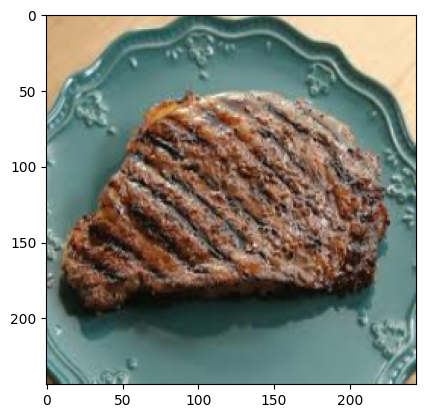

In [139]:
plt.imshow(np.array(image))

In [140]:
prediction = model_4.predict(tf.expand_dims(image,axis=0))

1/1 [==============================] - 0s 98ms/step


In [141]:
classnames[int(np.round(prediction)[0,0])]

'steak'

In [142]:
def show_prediction(model,filename):
    image = load_preprocess_image(filename,244)
    prediction = model_4.predict(tf.expand_dims(image,axis=0)) 
    plt.imshow(image)
    plt.title(f"Image of {classnames[int(np.round(prediction)[0,0])]}")
    plt.axis(False)
    plt.figure()
    print("probability",prediction[0,0])

1/1 [==============================] - 0s 31ms/step
probability 0.993202


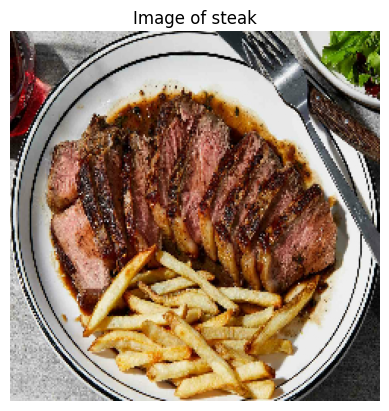

<Figure size 640x480 with 0 Axes>

In [149]:
show_prediction(model_4,"test.jpg")